# Task 7 🛳️
In this task, we use the [Titanic Dataset](https://www.kaggle.com/competitions/titanic/data)





## STEP 1:  Import Libraries & Load Data
----

In [ ]:
#import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mount drive to read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the csv file 
data = pd.read_csv('/content/drive/MyDrive/AI-Tasks/train.csv')

## STEP 2: Exploring Data
----

In [ ]:
data.shape #how many rows and columns are in the data

(891, 12)

In [ ]:
data.sample(10) #display random sample of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


In [ ]:
data.info() #information about the data set columns, how many non null valueand data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum() #how many null value in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.nunique() #the number of unique value in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
data.duplicated().sum() #how many duplicated value

0

In [ ]:
data.describe() #data set describtion

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Extra cell: Assess data
From the data exploring that we did above here is our note:

for example:
> ## Unwanted columns
1. Name
2. Ticket
1. Fare
1. Cabin
1. Embarked

> ## Nulls
1. Age (177 null value)

> ## Wrong columns datatype
1. Age (to int)
2. Sex (to category)


## STEP 3: Clean Data
----



 ### 1. First problem: Drop unwanted columns


In [ ]:
data.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True) #delete 5 column

In [ ]:
data.sample(5) #the data set after solving the second problem

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
119,120,0,3,female,2.0,4,2
767,768,0,3,female,30.5,0,0
576,577,1,2,female,34.0,0,0
872,873,0,1,male,33.0,0,0
213,214,0,2,male,30.0,0,0


In [ ]:
data.shape #data shape after drop columns

(891, 7)

 ### 2. Second problem: Fill null values

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True) #fill the null values in column Age with the mean of all ages

In [ ]:
data['Age'].describe() #check for outliers

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
data.isnull().sum() #check

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

### 3. Third problem: Change wrong columns datatype


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [ ]:
data = data.astype({"Age":'int', "Sex":'category'}) #change data types

In [ ]:
data = data[data.Age != 0] #delete ages with 0

##  The dataset AFTER solving problems
---

In [ ]:
data.shape

(884, 7)

> it is become 891 row and 7 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  884 non-null    int64   
 1   Survived     884 non-null    int64   
 2   Pclass       884 non-null    int64   
 3   Sex          884 non-null    category
 4   Age          884 non-null    int64   
 5   SibSp        884 non-null    int64   
 6   Parch        884 non-null    int64   
dtypes: category(1), int64(6)
memory usage: 49.3 KB


In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,884.000000,884.000000,884.000000,884,884.000000,884.000000,884.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,NaN,572,NaN,NaN,NaN
mean,445.128959,0.378959,2.308824,NaN,29.778281,0.519231,0.374434
std,257.123194,0.485403,0.837060,NaN,12.795568,1.104235,0.804195
min,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000
50%,444.500000,0.000000,3.000000,NaN,29.000000,0.000000,0.000000
75%,667.250000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000


In [ ]:
data.sample(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
49,50,0,3,female,18,1,0
884,885,0,3,male,25,0,0
741,742,0,1,male,36,1,0
345,346,1,2,female,24,0,0


## STEP 4: Data Preprocessing
----



In [ ]:
!pip install scikit-plot

### 1. First: convert columns to be numeric 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dummy = pd.get_dummies(data, columns=['Sex']) #covert category column
dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,0,3,22,1,0,0,1
1,2,1,1,38,1,0,1,0
2,3,1,3,26,0,0,1,0
3,4,1,1,35,1,0,1,0
4,5,0,3,35,0,0,0,1


In [ ]:
dummy.shape

(884, 8)

> it is become 891 row and 8 columns

In [ ]:
dummy.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Age            int64
SibSp          int64
Parch          int64
Sex_female     uint8
Sex_male       uint8
dtype: object

### 2. Second: Separate features and target columns & Convert them into np.array

In [ ]:
x = dummy.iloc[:,dummy.columns != "Survived"].to_numpy() #take the features which is from column index 1 to the last column
y = dummy.iloc[:,1].to_numpy() #take the target column which is with index 0

In [ ]:
pd.DataFrame(x) #features

,0,1,2,3,4,5,6
0,1,3,22,1,0,0,1
1,2,1,38,1,0,1,0
2,3,3,26,0,0,1,0
3,4,1,35,1,0,1,0
4,5,3,35,0,0,0,1
...,...,...,...,...,...,...,...
879,887,2,27,0,0,0,1
880,888,1,19,0,0,1,0
881,889,3,29,1,2,1,0
882,890,1,26,0,0,0,1


In [ ]:
pd.DataFrame(y) #target

,0
0,0
1,1
2,1
3,1
4,0
...,...
879,0
880,1
881,0
882,1


### 3. Third:  Split the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0) #random_state=0 to get the same train and test sets across different executions

## STEP 5: Model Building
----

### 1. Model One: Decision Tree Classification Algorithm🌳

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier() #create object
tree.fit(x_train, y_train) #train the object

tree_pred = tree.predict(x_test) #predict for the unlabeled data
tree_accuracy = accuracy_score(y_test, tree_pred) #calculate the accuracy between unlabel data and actual data

print("Accuracy Score of Tree Classification Algorithm is: {:0.2f}%".format(tree_accuracy*100))

Accuracy Score of Tree Classification Algorithm is: 69.92%


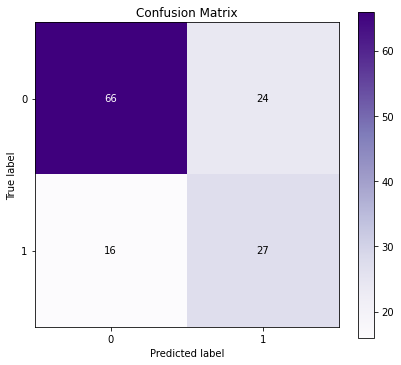

In [ ]:
import scikitplot as skplt
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, tree_pred, title="Confusion Matrix", ax=ax1, cmap='Purples')
plt.show()

### 2. Model two: Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() #create object
forest.fit(x_train, y_train) #train the object

forest_pred = forest.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_pred) #calculate the accuracy score

print("Accuracy Score of Random Forest Algorithm is: {:0.2f}%".format(forest_accuracy*100))

Accuracy Score of Random Forest Algorithm is: 73.68%


### 3. Model Three: Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(x_train, y_train)

regression_pred = regression.predict(x_test)
regression_accuracy = accuracy_score(y_test, regression_pred)

print("Accuracy Score of Logistic Regression Algorithm is: {:0.2f}%".format(regression_accuracy*100))

Accuracy Score of Logistic Regression Algorithm is: 73.68%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


> **Hyperparameter Tuning**
* GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.
* GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV 

#define parameters
param = {
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter':[100, 1000, 2500, 5000],
    'C': np.logspace(-4, 4, 20)
}

search = GridSearchCV(regression, param_grid=param, verbose=True, cv=3, n_jobs=-1) #define GridSearchCV 
result = search.fit(x_train, y_train) #execute search

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(f'Accuracy: {result.score(x_train, y_train):.2f}')

Best Score: 0.8135617529880478
Best Hyperparameters: {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.82


### 4. Model Four: K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Accuracy Score of K-Nearest Neighbor Algorithm is: {:0.2f}%".format(knn_accuracy*100))

Accuracy Score of K-Nearest Neighbor Algorithm is: 55.64%


### 5. Model Five: Support Vector Machines(SVM) algorithm.

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

print("Accuracy Score of SVM algorithm Algorithm is: {:0.2f}%".format(svc_accuracy*100))

Accuracy Score of SVM algorithm Algorithm is: 74.44%


### 6. Model Six: Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Accuracy Score of Naive Bayes Algorithm is: {:0.2f}%".format(nb_accuracy*100))

Accuracy Score of Naive Bayes Algorithm is: 75.19%


### 7. Model Seven: K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) 
kmeans.fit(x_train, y_train)

kmeans_pred = kmeans.predict(x_test)
kmeans_accuracy = accuracy_score(y_test, kmeans_pred)

print("Accuracy Score of K-Means Algorithm is: {:0.2f}%".format(kmeans_accuracy*100))

Accuracy Score of K-Means Algorithm is: 46.62%


In [ ]:
Model = pd.Series({'Model_Name': "Accuracy",
                    'Decision Tree Classification Algorithm': tree_accuracy*100,
                    'Random Forest Algorithm': forest_accuracy*100,
                    'Logistic Regression Algorithm': regression_accuracy*100,
                    'K-Nearest Neighbor(KNN) Algorithm': knn_accuracy*100,
                    'Support Vector Machines(SVM) Algorithm': svc_accuracy*100,
                    'Naive Bayes Algorithm': nb_accuracy*100,
                    'K-Means Algorithm' : kmeans_accuracy*100
                     })
pd.DataFrame(Model)

,0
Model_Name,Accuracy
Decision Tree Classification Algorithm,69.924812
Random Forest Algorithm,73.684211
Logistic Regression Algorithm,73.684211
K-Nearest Neighbor(KNN) Algorithm,55.639098
Support Vector Machines(SVM) Algorithm,74.43609
Naive Bayes Algorithm,75.18797
K-Means Algorithm,46.616541


In [ ]:
from google.colab import files
data.to_csv('dummy.csv') 
files.download('dummy.csv')